# Introducción a las Variables Aleatorias

## ¿Qué es una variable aleatoria?
 
**Intuitivamente**: 
- Una variable aleatoria es un **modelo matemático del comportamiento aleatorio** de un sistema. No representa la causa, sino **el resumen cuantitativo de lo que observamos**.
Podemos imaginarlas como una *'máquina'* que simula un experimento aleatorio y cada vez que la usas, te devuelve un resultado.

- En Python, esta máquina se representa con una función que puedes ejecutar cuantas veces quieras para obtener realizaciones.

In [ ]:
import random
# Variable aleatoria uniforme discreta entre 1 y 6 (un dado)
def lanzar_dado():
    return random.randint(1, 6)

# Simular 10 tiros
resultados = [lanzar_dado() for _ in range(10)]
print(resultados)

[3, 1, 2, 1, 3, 4, 3, 1, 2, 5]


## Semillas

Cuando usamos funciones aleatorias en programación, en realidad no estamos obteniendo números realmente aleatorios, sino **pseudoaleatorios**. Es decir, los números son generados por un algoritmo **determinista** que imita la aleatoriedad.

La semilla es el punto de partida del algoritmo.

**¿Por qué usar semillas?**

- Para que tus simulaciones sean **reproducibles**: dos personas que usen el mismo código y la misma semilla obtendrán **resultados identicos**.

- Para depurar o probar código, ya que puedes repetir exactamente lo que ocurrió.

- Para comparar métodos bajo las mismas condiciones aleatorias.

In [ ]:
import random

random.seed(42)  # Semilla fija
print([random.randint(1, 6) for _ in range(5)])

[6, 1, 1, 6, 3]


## Histogramas: herramientas para graficar el comportamiento de un fonémeno aleatorio

Un **histograma** es una gráfica que representa cómo se distribuyen los valores de una variable aleatoria en intervalos (llamados **bins**). Nos permite responder preguntas como:

- ¿Qué valores ocurren con mayor frecuencia?

- ¿Hay simetría o sesgo en los datos?

- ¿Los resultados se agrupan alrededor de cierto valor?

**Importante: Un histograma no muestra la probabilidad exacta, sino una estimación basada en una muestra finita de datos.**

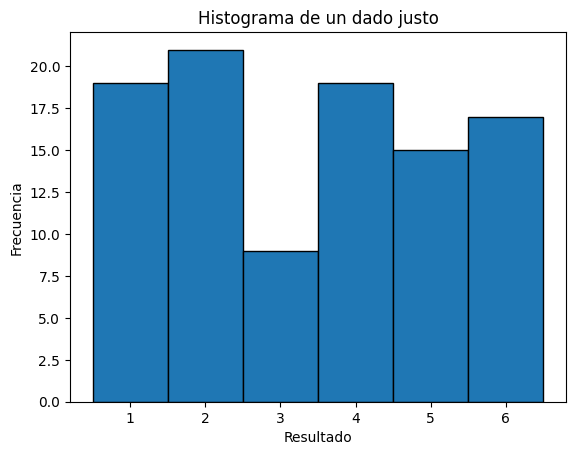

In [ ]:
import matplotlib.pyplot as plt

n = 100
datos = [lanzar_dado() for _ in range(n)]
plt.hist(datos, bins=range(1, 8), edgecolor='black', align='left')
plt.title("Histograma de un dado justo")
plt.xlabel("Resultado")
plt.ylabel("Frecuencia")
plt.show()

## Frecuencia y frecuencia relativa

La **frecuencia** o **frecuencia absoluta** de un valor en un conjunto de datos es simplemente el número de veces que ese valor aparece.

La **frecuencia relativa** es la proporción de veces que aparece un valor respecto al total de observaciones. Se calcula como:
$$
Frecuencia relativa=\frac{Frecuencia absoluta}{Número total de datos}
​$$


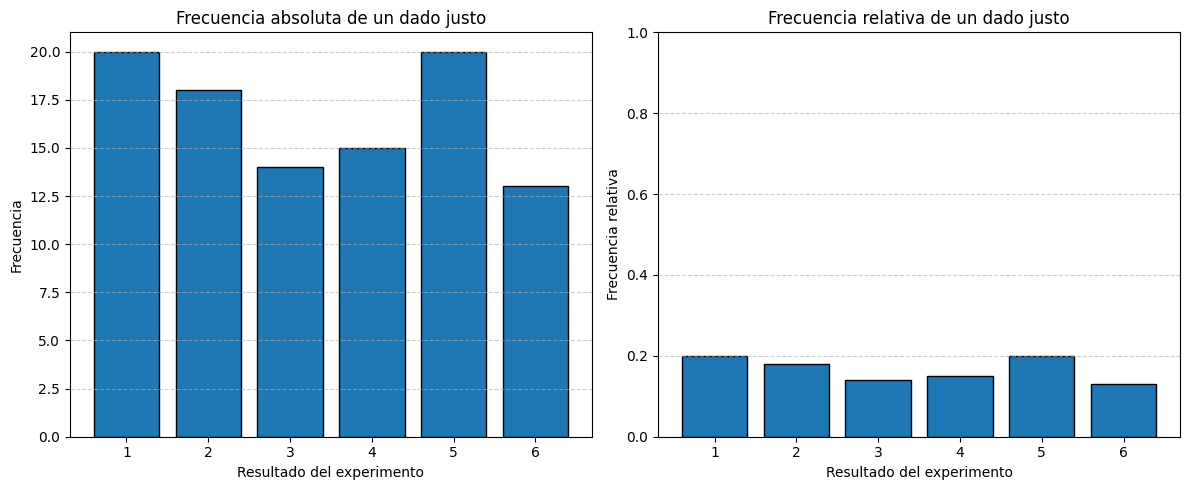

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def lanzar_dado():
    import random
    return random.randint(1, 6)

# Simulación de datos
n = 100
datos = [lanzar_dado() for _ in range(n)]

# Conteo de ocurrencias
conteo = Counter(datos)
valores = range(1, 7)
frecuencias = [conteo[k] for k in valores]
frecuencias_relativas = [f / n for f in frecuencias]

# Crear figura con dos subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de frecuencia absoluta
axs[0].bar(valores, frecuencias, edgecolor='black')
axs[0].set_title("Frecuencia absoluta de un dado justo")
axs[0].set_xlabel("Resultado del experimento")
axs[0].set_ylabel("Frecuencia")
axs[0].set_xticks(valores)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Histograma de frecuencia relativa
axs[1].bar(valores, frecuencias_relativas, edgecolor='black')
axs[1].set_title("Frecuencia relativa de un dado justo")
axs[1].set_xlabel("Resultado del experimento")
axs[1].set_ylabel("Frecuencia relativa")
axs[1].set_ylim(0, 1)
axs[1].set_xticks(valores)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Varibales aleatoria discretas

- Una **variable aleatoria discreta** es aquella que solo puede tomar valores en un conjunto discreto. Es como si pudieras enumerar los resultados posibles.

Una **función de probabilidad** (también llamada **función de masa de probabilidad**) se usa para variables aleatorias discretas y tiene las siguientes caracteristicas:
- Asocia a cada valor posible de la variable una probabilidad concreta.
- Suma total de las probabilidades es 1.

**Por ejemplo:**
La variable $X$ que representa el resultado de un dado tiene:
$$
P(X=k)=\frac{1}{6}, \qquad para \quad k\in\{1,2,3,4,5,6\}
$$

## Varibales aleatorias continuas

- Una **variable aleatoria continua** puede tomar valores dentro de un conjunto continuo(uno o varios intervalos). 

Una **función de densidad de probabilidad** se usa para variables aleatorias continuas y  tiene las siguientes caracteristicas:

- Asocia a cada número real $x$ una densidad, no una probabilidad directa.

- La probabilidad de que la variable tome exactamente un valor $x$ es cero:
$$
P(X=x)=0
$$

Lo que tiene sentido es la probabilidad de un intervalo:
$$
P(a\leq X\leq b)=\int_{a}^{b}f(x)dx
$$

**Ejemplo: Uniforme continua en [0, 1]**

La variable $X \sim U(0,1)$ tiene función de densidad:

$$
f(x) = \begin{cases}
1, & 0 \leq x \leq 1, \\
0, & \text{en otro caso}.
\end{cases}
$$

- Es constante en el intervalo, porque **todos los valores son igualmente probables** (en densidad).
- El área total bajo la curva es 1.


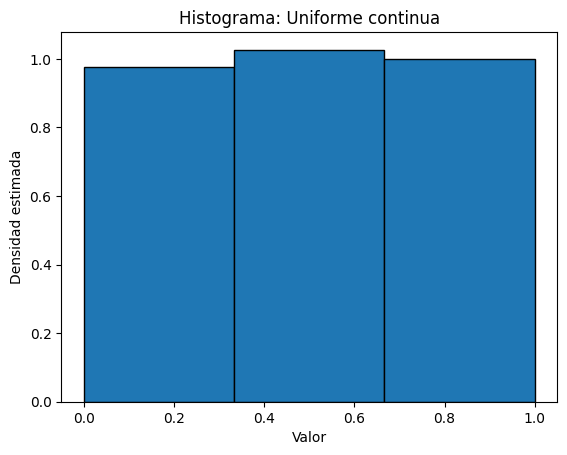

In [ ]:
import numpy as np

# Uniforme en [0, 1]
datos_continuos = np.random.uniform(0, 1, size=10000)
plt.hist(datos_continuos, bins=3, density=True, edgecolor='black')
plt.title("Histograma: Uniforme continua")
plt.xlabel("Valor")
plt.ylabel("Densidad estimada")
plt.show()

## Variable aleatoria de Poisson
La variable aleatoria de Poisson $X \sim \text{Poisson}(\lambda)$ modela el número de eventos que ocurren en un intervalo fijo de tiempo o espacio, cuando dichos eventos suceden:

- de forma independiente,

- a una tasa promedio constante $\lambda$,

- sin ocurrencias simultáneas.

**Interpretaciones comunes de una variable de Poisson:**
1. Número de llamadas que llegan a una central telefónica en una hora.
2. Número de accidentes de tráfico en una intersección por día.
3. Número de errores tipográficos por página en un libro.
4. Número de partículas que impactan un detector en un segundo.

Su función de masa de probabilidad esta dada por :
$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad \text{para } k \in \mathbb{N}\cup\{0\}
$$

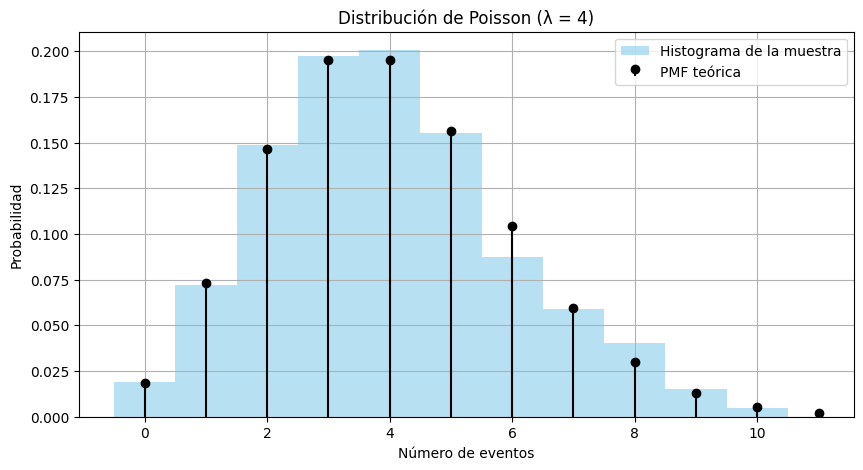

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetro de la distribución
lam = 4  # media de eventos por intervalo
n = 1000  # tamaño de la muestra

# Simulación
muestra = np.random.poisson(lam=lam, size=n)

# Rango de valores posibles
valores = np.arange(0, np.max(muestra) + 1)
pmf_teorica = poisson.pmf(valores, mu=lam)

plt.figure(figsize=(10, 5))

# Histograma de la muestra simulada
plt.hist(muestra, bins=valores - 0.5, density=True, alpha=0.6, color='skyblue', label='Histograma de la muestra')

# PMF teórica
plt.stem(valores, pmf_teorica, linefmt='k-', markerfmt='ko', basefmt=" ", label='PMF teórica')

plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson (λ = {})'.format(lam))
plt.legend()
plt.grid(True)
plt.show()

## Variable aleatoria exponencial
La variable aleatoria exponencial $T \sim \text{Exponencial}(\lambda)$ modela el tiempo que transcurre entre eventos que ocurren de manera independiente a una tasa promedio constante $\lambda$.

**Interpretaciones comunes:**
1. Tiempo hasta que llega la próxima llamada telefónica.
2. Tiempo entre fallas de un componente electrónico.
3. Tiempo entre clientes que llegan a una caja de supermercado.
4. Tiempo de espera en un sistema de colas.

Su función de densidad esta dada por:
$$
f(t) = \lambda e^{-\lambda t}, \quad \text{para } t \geq 0
$$

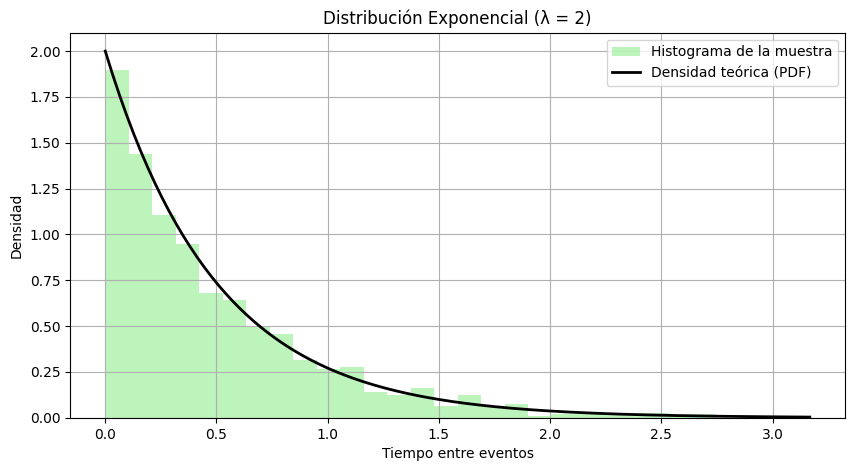

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parámetro de la distribución
lam = 2  # tasa de ocurrencia (λ)
n = 1000  # tamaño de la muestra

# Simulación (nota: scipy y numpy usan escala = 1/λ)
muestra = np.random.exponential(scale=1/lam, size=n)

# Rango de valores para la densidad teórica
x = np.linspace(0, np.max(muestra), 200)
pdf_teorica = lam * np.exp(-lam * x)  # f(t) = λ e^{-λt}


plt.figure(figsize=(10, 5))

# Histograma de la muestra simulada
plt.hist(muestra, bins=30, density=True, alpha=0.6, color='lightgreen', label='Histograma de la muestra')

# Densidad teórica
plt.plot(x, pdf_teorica, 'k-', lw=2, label='Densidad teórica (PDF)')

plt.xlabel('Tiempo entre eventos')
plt.ylabel('Densidad')
plt.title('Distribución Exponencial (λ = {})'.format(lam))
plt.legend()
plt.grid(True)
plt.show()

## Ejercicios:
**Resuelve 5 de los siguientes poblemas mediante simulación Monte Carlo con al menos 10,000 repeticiones.**  

Antes de encontrar la probabilidad con simulaciones, da una estimación del resultado usando tu intuición. La respuesta no será evaluada con respecto al resultado correcto sino a la argumentación que se proporcione. 

**Los ejercicios 6 y 9 son obligatorios**

1. Si cortas una bara de longitud 1 en tres partes al azar. ¿Cuál es la probabilidad de que esas tres partes puedan formar un triángulo?

Hint: Recuerda que para que tres longitudes $a,b,c$ formen un triángulo, deben cumplir la desigualdad triangular entre todas 
$$
a+b>c,\qquad a+c>b, \qquad b+c>a
$$

In [ ]:
import random

def cortar_barra():
    """Corta la barra de longitud 1 en dos puntos aleatorios."""
    x, y = random.random(), random.random()
    x, y = sorted([x, y])
    a = x
    b = y - x
    c = 1 - y
    return a, b, c

def cumple_desigualdad_triangulo(a, b, c):
    """Verifica si las tres partes pueden formar un triángulo."""
    return a + b > c and a + c > b and b + c > a

# Simulación Monte Carlo
n = 100_000
triangulos = 0

for _ in range(n):
    a, b, c = cortar_barra()
    if cumple_desigualdad_triangulo(a, b, c):
        triangulos += 1

probabilidad_estim = triangulos / n
print(f"Probabilidad estimada de formar un triángulo: {probabilidad_estim:.4f}")


Probabilidad estimada de formar un triángulo: 0.2495


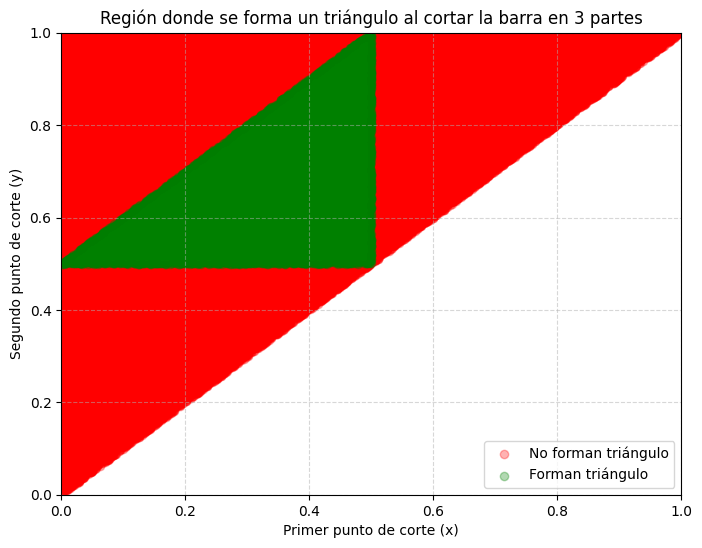

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar puntos aleatorios en el cuadrado [0,1]x[0,1]
n_puntos = 100_000
x = np.random.uniform(0, 1, n_puntos)
y = np.random.uniform(0, 1, n_puntos)

# Ordenamos los cortes: x <= y
x, y = np.minimum(x, y), np.maximum(x, y)

# Segmentos después del corte
a = x
b = y - x
c = 1 - y

# Condición para formar triángulo: todas las longitudes < 0.5
forman_triangulo = (a < 0.5) & (b < 0.5) & (c < 0.5)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(x[~forman_triangulo], y[~forman_triangulo], color='red', alpha=0.3, label='No forman triángulo')
plt.scatter(x[forman_triangulo], y[forman_triangulo], color='green', alpha=0.3, label='Forman triángulo')

plt.title("Región donde se forma un triángulo al cortar la barra en 3 partes")
plt.xlabel("Primer punto de corte (x)")
plt.ylabel("Segundo punto de corte (y)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


2. En una línea de metro, los pasajeros llegan a un vagón durante un intervalo de 10 minutos siguiendo una distribución de Poisson con media $λ=4$ pasajeros por minuto.

El vagón tiene capacidad máxima para 45 personas.

¿Cuál es la probabilidad de que el vagón se llene o se sobrepase su capacidad en ese lapso de 10 minutos?



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del experimento
N = 10000  # Número de simulaciones
capacidad_vagon = 45  # Límite del vagón
lambda_por_minuto = 4  # Tasa de llegadas por minuto
duracion_min = 10  # Duración del intervalo (en minutos)

# Contador de veces que se alcanza o supera la capacidad
exitos = 0
totales = []  # Para guardar los pasajeros totales por simulación

for _ in range(N):
    # Generamos llegadas por minuto y acumulamos
    llegadas = np.random.poisson(lam=lambda_por_minuto, size=duracion_min)
    acumuladas = np.cumsum(llegadas)

    # Guardamos el total de pasajeros al minuto 10
    totales.append(acumuladas[-1])

    # Verificamos si hubo sobrecupo en algún momento
    if np.any(acumuladas >= capacidad_vagon):
        exitos += 1

# Cálculo de la probabilidad estimada
probabilidad_estimada = exitos / N
print(f"Probabilidad estimada de sobrecupo: {probabilidad_estimada:.4f}")


Probabilidad estimada de sobrecupo: 0.2248


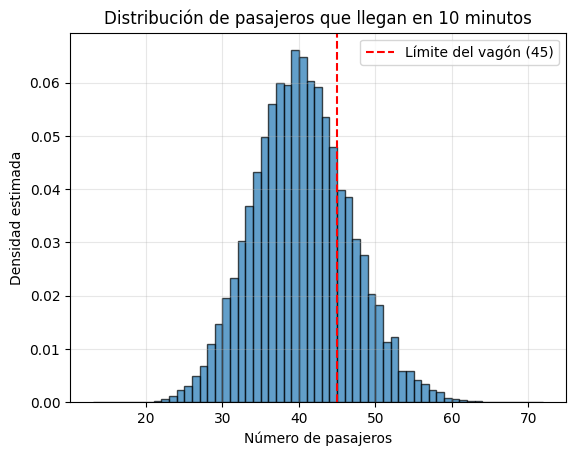

In [ ]:

# Visualización del histograma
plt.hist(totales, bins=range(min(totales), max(totales)+1), density=True,
         edgecolor='black', alpha=0.7)
plt.axvline(capacidad_vagon, color='red', linestyle='--', label='Límite del vagón (45)')
plt.title("Distribución de pasajeros que llegan en 10 minutos")
plt.xlabel("Número de pasajeros")
plt.ylabel("Densidad estimada")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


3. En una cafetería, los clientes llegan de forma aleatoria. El tiempo entre llegadas sigue una distribución exponencial con media de 3 minutos (es decir,$\lambda=\frac{1}{3}$)

Un barista se pregunta:
```quote
“¿Cuál es la probabilidad de que tenga que esperar más de 5 minutos antes de que llegue el siguiente cliente?”
```

In [ ]:
import random

# Parámetros
N = 100_000
lambda_inv = 3  # media = 3 → λ = 1/3
esperas_largas = 0

# Simulación
for _ in range(N):
    tiempo = random.expovariate(1 / lambda_inv)
    if tiempo > 5:
        esperas_largas += 1

probabilidad_estim = esperas_largas / N
print(f"Probabilidad estimada de esperar más de 5 minutos: {probabilidad_estim:.4f}")


Probabilidad estimada de esperar más de 5 minutos: 0.1891


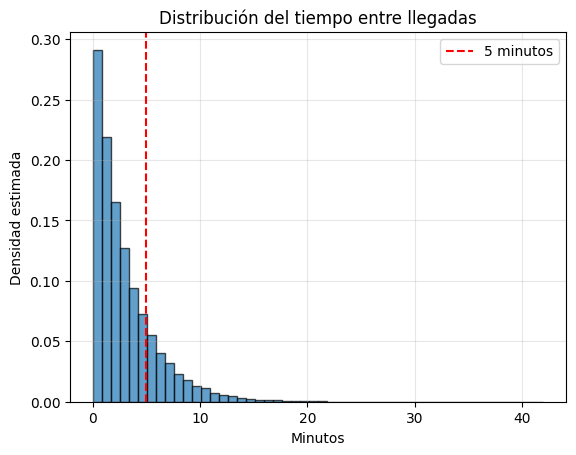

In [ ]:
import matplotlib.pyplot as plt

# Generar datos
tiempos = [random.expovariate(1 / lambda_inv) for _ in range(N)]

# Histograma
plt.hist(tiempos, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(5, color='red', linestyle='--', label='5 minutos')
plt.title("Distribución del tiempo entre llegadas")
plt.xlabel("Minutos")
plt.ylabel("Densidad estimada")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


4. En un salón con 23 personas, ¿cuál es la probabilidad de que al menos dos personas compartan cumpleaños?

Nota: El comando `random.choice()` en Python es una herramienta muy útil para elegir un elemento al azar de una lista (o cualquier secuencia). Es parte del módulo `random`.

Supongamos que tienes una lista de frutas y quieres elegir una al azar:

```python
import random

frutas = ['manzana', 'plátano', 'naranja', 'kiwi']
fruta_aleatoria = random.choice(frutas)

print(f"Hoy comerás: {fruta_aleatoria}")
```

In [3]:
import random

def hay_cumpleaños_repetido(n_personas=23):
    """Simula cumpleaños y verifica si hay al menos una coincidencia"""
    cumpleaños = [random.randint(1, 365) for _ in range(n_personas)]
    return len(set(cumpleaños)) < n_personas  # True si hay repetidos

# Simulación Monte Carlo
N = 100_000
coincidencias = 0

for _ in range(N):
    if hay_cumpleaños_repetido():
        coincidencias += 1

probabilidad_estimada = coincidencias / N
print(f"Probabilidad estimada de al menos un cumpleaños compartido: {probabilidad_estimada:.4f}")


Probabilidad estimada de al menos un cumpleaños compartido: 0.5059


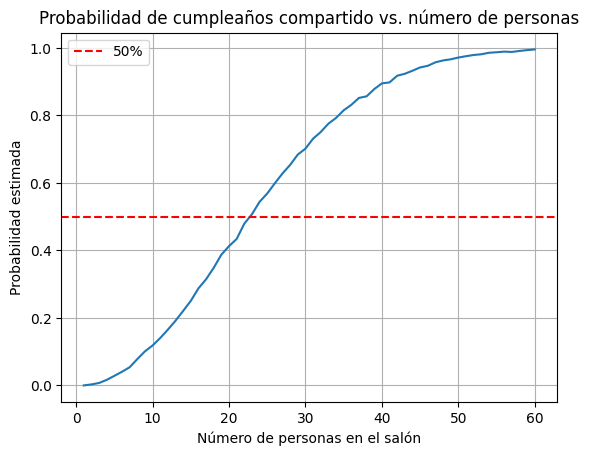

In [4]:
import matplotlib.pyplot as plt

def estimar_probabilidad(n_personas, repeticiones=10000):
    return sum(hay_cumpleaños_repetido(n_personas) for _ in range(repeticiones)) / repeticiones

personas = range(1, 61)
probs = [estimar_probabilidad(n) for n in personas]

plt.plot(personas, probs)
plt.axhline(0.5, color='red', linestyle='--', label='50%')
plt.title("Probabilidad de cumpleaños compartido vs. número de personas")
plt.xlabel("Número de personas en el salón")
plt.ylabel("Probabilidad estimada")
plt.grid(True)
plt.legend()
plt.show()

5. Dos amigos acuerdan encontrarse entre las 12:00 y las 13:00. Cada uno llega en un momento aleatorio dentro de esa hora y espera 15 minutos.
¿Cuál es la probabilidad de que se encuentren?

In [26]:
import random
import matplotlib.pyplot as plt

# Simulación Monte Carlo del problema del encuentro aleatorio
N = 100000
exitos = 0
puntos_x = []
puntos_y = []
colores = []

for _ in range(N):
    a = random.uniform(0, 60)
    b = random.uniform(0, 60)
    puntos_x.append(a)
    puntos_y.append(b)
    if abs(a - b) <= 15:
        exitos += 1
        colores.append('green')  # se encuentran
    else:
        colores.append('red')    # no se encuentran

probabilidad_estim = exitos / N
print(f"Probabilidad estimada de encuentro: {probabilidad_estim:.4f}")

Probabilidad estimada de encuentro: 0.4407


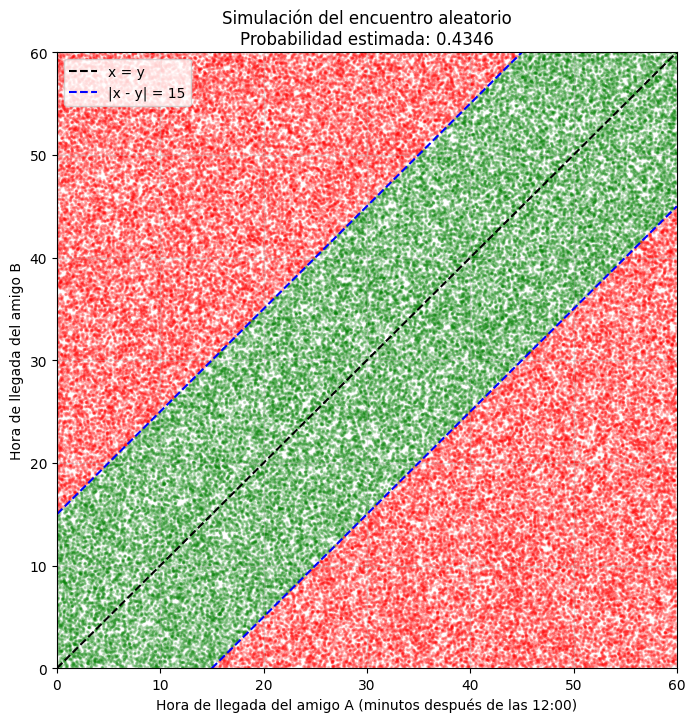

In [ ]:
# Visualización
plt.figure(figsize=(8, 8))
plt.scatter(puntos_x, puntos_y, c=colores, alpha=0.2, s=2)
plt.plot([0, 60], [0, 60], 'k--', label='x = y')
plt.plot([0, 60], [15, 75], 'blue', linestyle='--', label='|x - y| = 15')
plt.plot([0, 60], [-15, 45], 'blue', linestyle='--')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel("Hora de llegada del amigo A (minutos después de las 12:00)")
plt.ylabel("Hora de llegada del amigo B")
plt.title(f"Simulación del encuentro aleatorio\nProbabilidad estimada: {probabilidad_estim:.4f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

6. Se tienene tres cajas:

- Una contiene dos bolas blancas (BB)

- Una contiene una blanca y una negra (BN)

- Una contiene dos bolas negras (NN)

Se elige una caja al azar, se extrae una bola al azar, y resulta ser blanca.
¿Cuál es la probabilidad de que la otra bola en la misma caja también sea blanca?

In [18]:
import random

def experimento_cajas():
    cajas = [['B', 'B'], ['B', 'N'], ['N', 'N']]
    caja = random.choice(cajas)
    bola = random.choice(caja)
    
    if bola == 'B':
        otra = caja[0] if (caja[1] == bola) else caja[1]
        return otra == 'B'
    else:
        return None

# Simulación
N = 100_000
validos = 0
exitos = 0

for _ in range(N):
    resultado = experimento_cajas()
    if resultado is not None:
        validos += 1
        if resultado:
            exitos += 1

probabilidad_estimada = exitos / validos
print(f"Probabilidad estimada de que la otra bola sea blanca: {probabilidad_estimada:.4f}")


Probabilidad estimada de que la otra bola sea blanca: 0.6690


7. Se barajan $n$ cartas numeradas del 1 al $n$, y se voltean una a una.
¿Cuál es la probabilidad de que ninguna carta esté en su lugar original?

In [15]:
import random

def sin_fijos(n):
    original = list(range(n))
    barajada = original.copy()
    random.shuffle(barajada)
    return all(barajada[i] != original[i] for i in range(n))

# Simulación
N = 100_000
n = 100  # número de cartas
exitos = sum(sin_fijos(n) for _ in range(N))
probabilidad = exitos / N

print(f"Probabilidad estimada de derangement para n={n}: {probabilidad:.4f}")
print(f"Probabilidad teórica de derangement para n={n}: {1 / np.e:.4f}")


Probabilidad estimada de derangement para n=1000: 0.3668
Probabilidad teórica de derangement para n=1000: 0.3679


8. Generas números aleatorios entre 0 y 1 hasta que su suma supere 1.
¿Cuántos números esperas generar?

In [23]:
import random
import numpy as np

def numeros_hasta_superar_1():
    suma = 0
    contador = 0
    while suma <= 1:
        suma += random.uniform(0, 1)
        contador += 1
    return contador

# Simulación
N = 100_000
total = sum(numeros_hasta_superar_1() for _ in range(N))
esperanza_estimada = total / N

print(f"Esperanza estimada de números generados: {esperanza_estimada:.4f}")
print(f"Esperanza teórica: {np.e:.4f}")  # Teóricamente, E[X] = e


Esperanza estimada de números generados: 2.7244
Esperanza teórica: 2.7183


9. Estás en un concurso y te presentan **tres puertas**.

- Detrás de **una** de ellas hay un **premio**.
- Detrás de las otras **no hay premio**.

El juego funciona así:

1. El concursante elige una puerta al azar (pero no la abre).
2. El anfitrión, que **sabe dónde está el premio**, abre una de las otras **dos puertas** que **no tiene premio**.
3. Luego te pregunta:

> “¿Quieres quedarte con tu elección inicial o cambiar a la otra puerta que queda cerrada?”

---

**Pregunta:**

> ¿Cuál es la probabilidad de ganar si te quedas con tu elección original?  
> ¿Cuál es la probabilidad de ganar si cambias de puerta?


In [17]:
import random

def simular_concurso(cambiar=True):
    premio = random.randint(0, 2)     # posición del premio
    eleccion = random.randint(0, 2)   # elección del jugador

    # El anfitrión abre una puerta que no tiene premio ni es la elegida
    puertas = [0, 1, 2]
    opciones_para_abrir = [p for p in puertas if p != eleccion and p != premio]
    puerta_abierta = random.choice(opciones_para_abrir)

    # Si el jugador cambia, se queda con la puerta que no eligió ni se abrió
    if cambiar:
        opciones_restantes = [p for p in puertas if p != eleccion and p != puerta_abierta]
        eleccion = opciones_restantes[0]

    return eleccion == premio  # ¿Ganó?

# Simulación Monte Carlo
N = 100_000
ganar_cambiando = sum(simular_concurso(cambiar=True) for _ in range(N)) / N
ganar_sin_cambiar = sum(simular_concurso(cambiar=False) for _ in range(N)) / N

print(f"Probabilidad de ganar sin cambiar: {ganar_sin_cambiar:.4f}")
print(f"Probabilidad de ganar cambiando:   {ganar_cambiando:.4f}")


Probabilidad de ganar sin cambiar: 0.3338
Probabilidad de ganar cambiando:   0.6670
